*Copyright 2024 Jaeyoung Chun*

You may not make copies of this and use or distribute it for any purpose.

# Yellow Cards

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

## Load Data

In [2]:
df_events = pd.read_csv("raw_events.csv")

In [3]:
df_events

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",South Korea,791,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Portugal,780,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,South Korea,791,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,South Korea,791,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Ui-Jo Hwang,29966.0,NaN,South Korea,791,00:36:13.753,Substitution,NaN
3375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,William Silva de Carvalho,5214.0,NaN,Portugal,780,00:36:13.762,Substitution,NaN
3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Bernardo Mota Veiga de Carvalho e Silva,3193.0,NaN,Portugal,780,00:36:13.790,Substitution,NaN
3377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Yu-Min Cho,99479.0,NaN,South Korea,791,00:47:46.061,Substitution,NaN


## Card Types

In [4]:
# columns that contain the word `card`
df_events.columns[ df_events.columns.str.contains("card") ]

Index(['bad_behaviour_card', 'foul_committed_card'], dtype='object')

## Foul Committed

### Search

In [5]:
df_yellow_cards = df_events[ df_events.foul_committed_card == "Yellow Card" ]

In [6]:
df_yellow_cards

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
3016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,South Korea,791,00:35:42.240,Foul Committed,NaN


### Who, When, and Where?

In [7]:
df_yellow_cards.player

3016    Kang-In Lee
Name: player, dtype: object

In [8]:
df_yellow_cards.timestamp

3016    00:35:42.240
Name: timestamp, dtype: object

In [9]:
df_yellow_cards.location

3016    [87.1, 37.6]
Name: location, dtype: object

### Visualization

ValueError: too many values to unpack (expected 2)

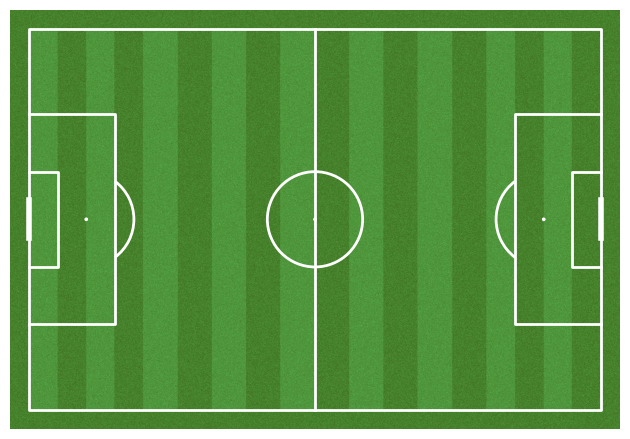

In [10]:
pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

df = df_yellow_cards.squeeze()
x, y = df.location

pitch.scatter(x, y, color="yellow", s=100, ax=ax)

pitch.annotate(
    df.player,
    (x - 10, y - 3),
    color="white", fontweight="bold",
    ax=ax
)

plt.show()

## Bad Behaviour

### Search

In [11]:
df_bad = df_events[ df_events.bad_behaviour_card == "Yellow Card"]

In [12]:
df_bad

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
3378,Yellow Card,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,South Korea,791,00:47:36.651,Bad Behaviour,None


### Who, When, and Where?

In [13]:
df_bad.player

3378    Hee-Chan Hwang
Name: player, dtype: object

In [14]:
df_bad.timestamp

3378    00:47:36.651
Name: timestamp, dtype: object

In [15]:
df_bad.location

3378    None
Name: location, dtype: object

Why location is none?

### Visualization

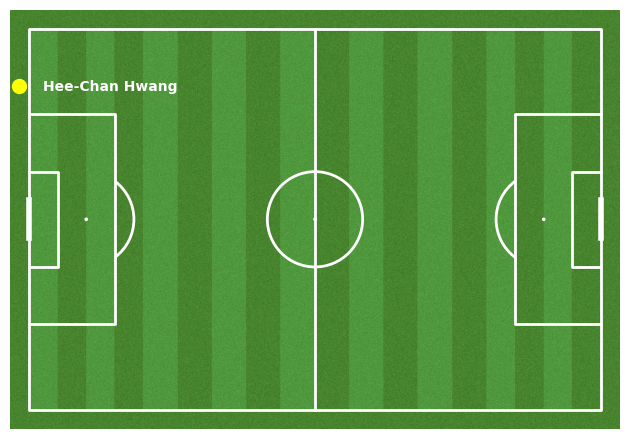

In [16]:
pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

pitch.scatter(-2.2, 12, color="yellow", s=100, ax=ax)

pitch.annotate(
    df_bad.squeeze().player,
    (3, 13),
    color="white", fontweight="bold",
    ax=ax
)

plt.show()